# Plagiarism Checker

In [30]:
%pip install seaborn
%pip install matplotlib

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Solution ways

In [34]:
def create_corpus(docs):
    """Tạo corpus từ danh sách văn bản"""
    processed_docs = [preprocess(doc) for doc in docs]
    vocabulary = sorted(set(word for doc in processed_docs for word in doc))
    return processed_docs, vocabulary

def preprocess(text):
    text = text.lower() # Chuyển về chữ thường
    words = text.split() # Tách từ
    return words

def compute_tf(word_list, vocabulary):
    """Tính TF (Term Frequency)"""
    word_count = {}
    for word in word_list:
        word_count[word] = word_count.get(word, 0) + 1
    tf_vector = np.array([word_count[word] / len(word_list) if word in
    word_count else 0 for word in vocabulary])
    return tf_vector

def compute_idf(docs, vocabulary):
    """Tính IDF (Inverse Document Frequency)"""
    num_docs = len(docs)
    idf_vector = np.array([
        np.log((num_docs + 1) / (1 + sum(1 for doc in docs if word in doc))) + 1 
        for word in vocabulary
    ])
    return idf_vector

def compute_tf_idf(docs):
    """Tính ma trận TF-IDF"""
    # Tạo corpus
    processed_docs, vocabulary = create_corpus(docs)

    # Tính TF và IDF
    tf_matrix = np.array([compute_tf(doc, vocabulary) for doc in 
    processed_docs])
    idf_vector = compute_idf(processed_docs, vocabulary)

    # Tính TF-IDF
    tf_idf_matrix = tf_matrix * idf_vector # Nhân từng phần tử theo chiều dọc
    return tf_idf_matrix


In [35]:
# --- Chaỵ Thử Nghiệm ---
docs = [
        "Học máy là một nhánh của trí tuệ nhân tạo",
        "Trí tuệ nhân tạo bao gồm học máy và mạng nơ ron",
        "Mạng nơ ron là một mô hình quan trọng trong học sâu",
        "Học sâu là một lĩnh vực của trí tuệ nhân tạo và học máy"
]

tf_idf_matrix = compute_tf_idf(docs)
print(f"TF-IDF Matrix: \n {tf_idf_matrix}")

TF-IDF Matrix: 
 [[0.         0.15108256 0.         0.         0.1        0.12231436
  0.         0.12231436 0.         0.         0.12231436 0.19162907
  0.12231436 0.         0.         0.         0.         0.
  0.12231436 0.         0.12231436 0.12231436 0.         0.        ]
 [0.15969089 0.         0.15969089 0.         0.08333333 0.
  0.         0.10192863 0.         0.12590214 0.         0.
  0.10192863 0.12590214 0.         0.12590214 0.         0.
  0.10192863 0.         0.10192863 0.10192863 0.12590214 0.        ]
 [0.         0.         0.         0.15969089 0.08333333 0.10192863
  0.         0.         0.15969089 0.12590214 0.10192863 0.
  0.         0.12590214 0.15969089 0.12590214 0.12590214 0.15969089
  0.         0.15969089 0.         0.         0.         0.        ]
 [0.         0.10791612 0.         0.         0.14285714 0.0873674
  0.13687791 0.0873674  0.         0.         0.0873674  0.
  0.0873674  0.         0.         0.         0.10791612 0.
  0.0873674  0.  

- Check cosine similarity
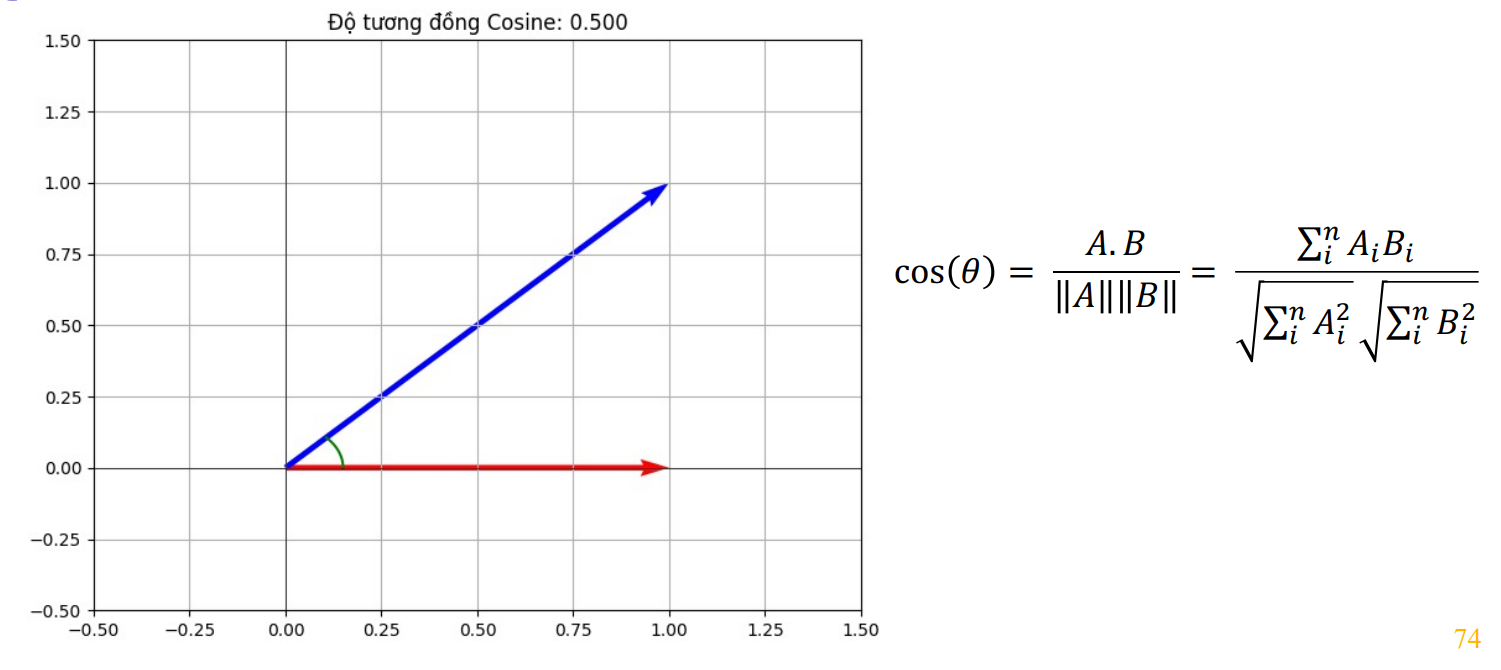

In [39]:
# Tính độ tương đồng các cặp văn bản

def cosine_similarity(vec1, vec2):
    """Tính độ tương đồng cosine giữa 2 vector"""
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2) if norm1 * norm2 != 0 else 0

def check_plagiarism_all(docs):
    """Tính độ tương đồng giữa tất cả các cặp văn bản"""
    tf_idf_matrix = compute_tf_idf(docs)
    num_docs = len(docs)

    similarity_matrix = np.zeros((num_docs, num_docs))

    for i in range(num_docs):
        for j in range(num_docs):
            similarity_matrix[i, j] = cosine_similarity(tf_idf_matrix[i],
            tf_idf_matrix[j])
    return similarity_matrix


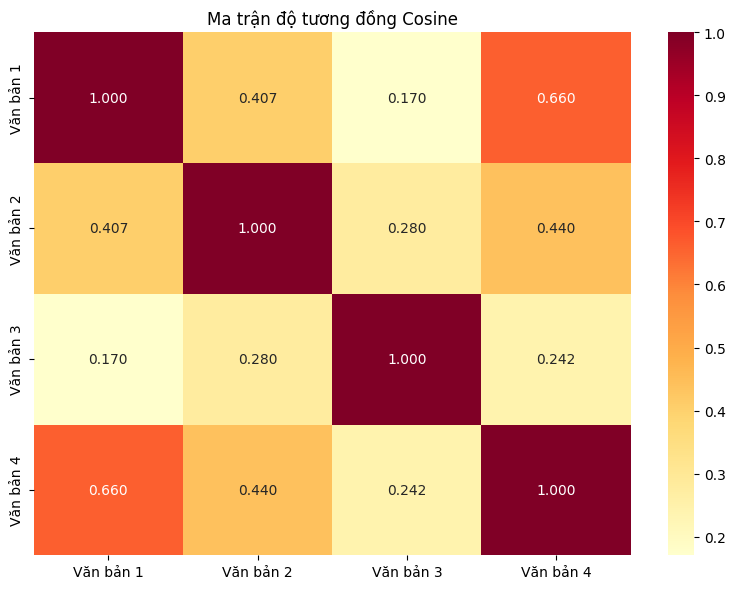

In [41]:
# --- Chaỵ Thử Nghiệm ---
docs = [
        "Học máy là một nhánh của trí tuệ nhân tạo",
        "Trí tuệ nhân tạo bao gồm học máy và mạng nơ ron",
        "Mạng nơ ron là một mô hình quan trọng trong học sâu",
        "Học sâu là một lĩnh vực của trí tuệ nhân tạo và học máy"
]

similarity_matrix = check_plagiarism_all(docs)

# Vẽ ma trận độ tương đồng sử dụng seaborn
plt.figure(figsize=(8,6))
sns.heatmap(similarity_matrix,
            annot=True,
            fmt='.3f',
            cmap='YlOrRd',
            xticklabels=[f'Văn bản {i+1}' for i in range(len(docs))],
            yticklabels=[f'Văn bản {i+1}' for i in range(len(docs))]
            )
plt.title('Ma trận độ tương đồng Cosine')
plt.tight_layout()
plt.show()